# Ejercicio de Regresión lineal

Ajuste a una **línea recta** los valores de las observaciones **$x$** e **$y$** de la siguiente tabla:

| $x_{i}$ | $y_{i}$ |
|:--:|:--:|
| 1  |0.5 |
| 2  |2.5 |
| 3  |2.0 |
| 4  |4.0 |
| 5  |3.5 |
| 6  |6.0 |
| 7  |5.5 |




MODELO DE REGRESION LINEAL => y=0.0714+0.8393*x
Observaciones y comparación del error cuadrático con la media y el modelo de regresión lineal ...
+-------+--------+---------+--------------+
|  xi   |   yi   |(yi-ym)^2|(yi-a0-a1xi)^2|
+-------+--------+---------+--------------+
|  1    |  0.5   |   8.5765|        0.1687|
|  2    |  2.5   |   0.8622|        0.5625|
|  3    |  2.0   |   2.0408|        0.3473|
|  4    |  4.0   |   0.3265|        0.3265|
|  5    |  3.5   |   0.0051|        0.5896|
|  6    |  6.0   |   6.6122|        0.7972|
|  7    |  5.5   |   4.2908|        0.1993|
+-------+--------+---------+--------------+


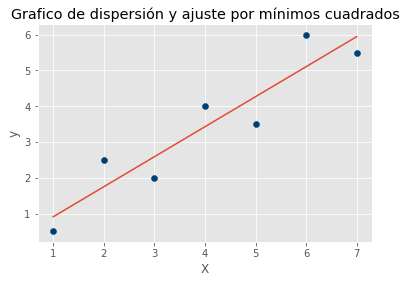

In [49]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style

# Modelo de regresion lineal ---------------------------------------------------
def f(x, a0, a1):
    return a0 + a1 * x

# Calculando parámetro a1 del modelo de regresion lineal -----------------------
def c_a1(x,y):
    n = len(x)
    
    sxy = 0
    sx  = 0
    sy  = 0
    sx2 = 0
    for i in range(n):
        sxy += x[i]*y[i]
        sx += x[i]
        sy += y[i]
        sx2 += x[i] * x[i]
        
    return (n*sxy - sx * sy)/(n*sx2 - sx * sx)

# Calculando Parámetro a0 del modelo de regresion lineal --------------------
def c_a0(x,y,a1):
    n = len(x)
    
    sx = 0
    sy = 0
    
    for i in range(n):
        sx += x[i]
        sy += y[i]
        
    return sy/n - a1*sx/n

# Graficando las observaciones y el modelo de regresión lineal --------------
def graficar(x,y,yp):
    
    style.use('ggplot')
    plt.title('Grafico de dispersión y ajuste por mínimos cuadrados')
    plt.xlabel('X')
    plt.ylabel('y')
    
    plt.scatter(x,y,color='#003F72')
    plt.plot(x,yp, linestyle='solid')
    
    plt.show()
    
# Tabulando datos, comparando error respecto a la media y al modelo de regresion lineal -----

def tabular(x,y,yp):
    n  = len(x)
    
    s = 0
    for i in range(n):
        s += y[i]
    ym = s / n
    
    print("Observaciones y comparación del error cuadrático con la media y el modelo de regresión lineal ...")
    
    print("+-------+--------+---------+--------------+")
    print("|  xi   |   yi   |(yi-ym)^2|(yi-a0-a1xi)^2|")
    print("+-------+--------+---------+--------------+")
    
    for i in range(n):
        print(f"|  {x[i]}    |  {y[i]}   |{(y[i]-ym)**2:>9.4f}|{(y[i] - yp[i])**2:>14.4f}|")
        
    print("+-------+--------+---------+--------------+")

# Programa principal -------------------------------------------

def main():
# Observaciones ------------------------------------------------    
    x = [1, 2, 3, 4, 5, 6, 7]
    y = [0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5]
    
# Calculando los valores de los parámetros a0 y a1 -------------
    a1 = c_a1(x,y)
    a0 = c_a0(x,y,a1)
    
# Calculando el modelo lineal ----------------------------------
    
    yp = [f(i,a0,a1) for i in x]
    
# Tabulando y graficando ---------------------------------------

    print(f"MODELO DE REGRESION LINEAL => y={a0:.4f}+{a1:.4f}*x")
    print()

    tabular(x,y,yp)
    graficar(x,y,yp)
    
main()